![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB
None


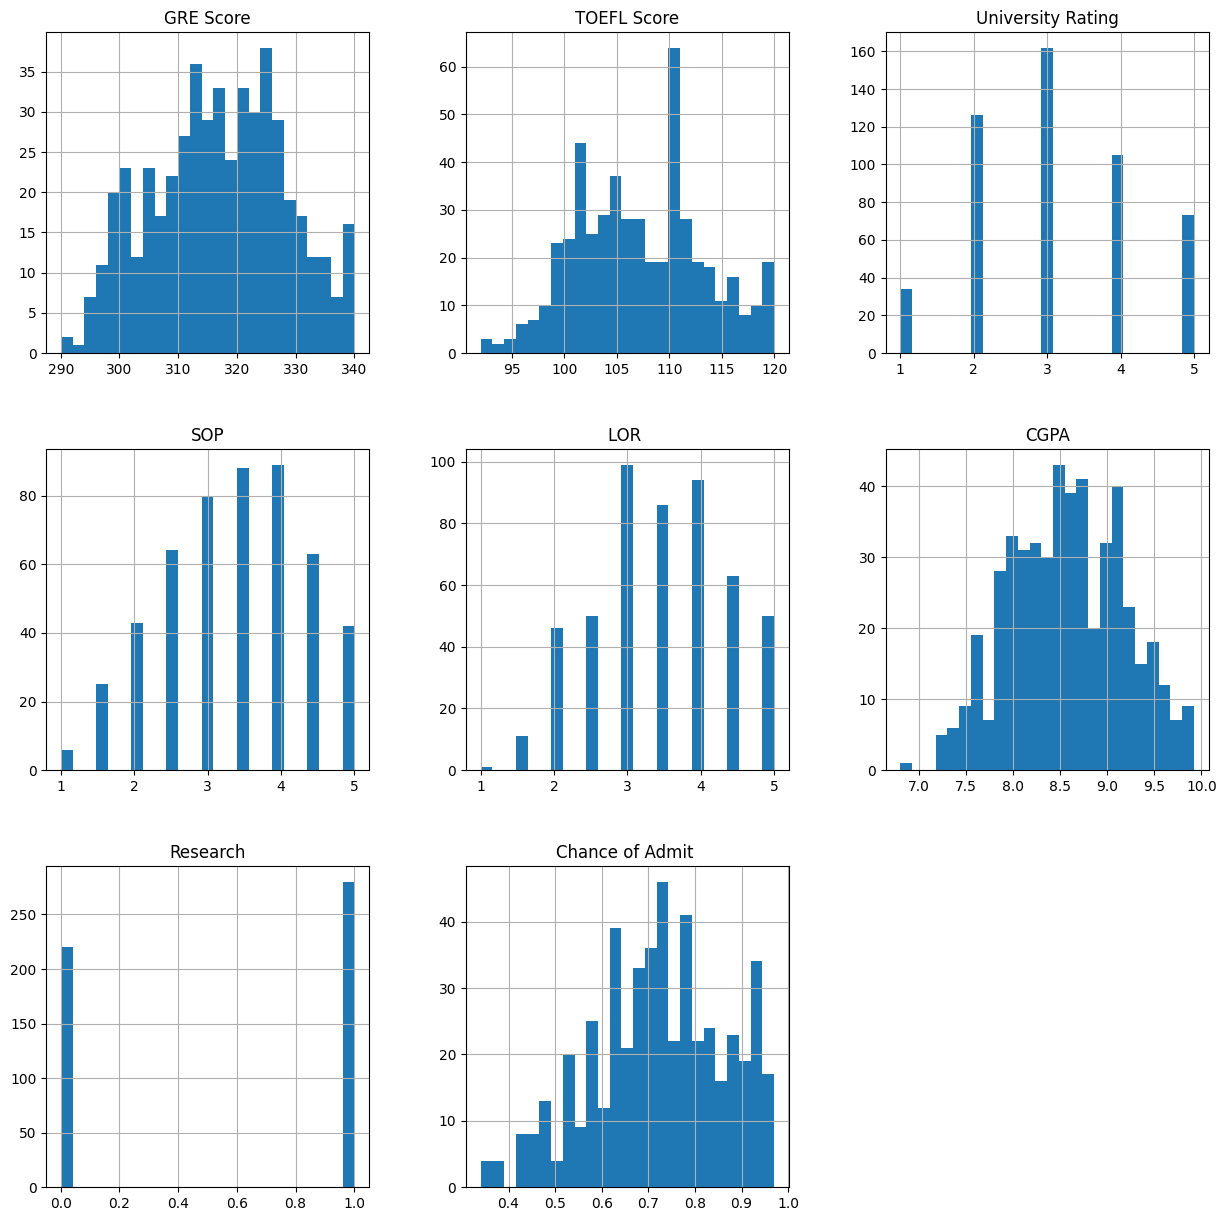

In [ ]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [ ]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [ ]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Epoch 1/500
3/3 [==============================] - 2s 270ms/step - loss: 5410.0527 - val_loss: 5255.1284
Epoch 2/500
3/3 [==============================] - 0s 42ms/step - loss: 5215.8491 - val_loss: 5064.6968
Epoch 3/500
3/3 [==============================] - 0s 66ms/step - loss: 5025.4985 - val_loss: 4878.1807
Epoch 4/500
3/3 [==============================] - 0s 42ms/step - loss: 4838.6899 - val_loss: 4695.7803
Epoch 5/500
3/3 [==============================] - 0s 63ms/step - loss: 4656.6333 - val_loss: 4517.5215
Epoch 6/500
3/3 [==============================] - 0s 75ms/step - loss: 4478.0723 - val_loss: 4343.6543
Epoch 7/500
3/3 [==============================] - 0s 35ms/step - loss: 4304.7183 - val_loss: 4174.0981
Epoch 8/500
3/3 [==============================] - 0s 68ms/step - loss: 4135.5581 - val_loss: 4009.0066
Epoch 9/500
3/3 [==============================] - 0s 57ms/step - loss: 3970.5449 - val_loss: 3848.4880
Epoch 10/500
3/3 [==============================] - 0s 44ms/ste

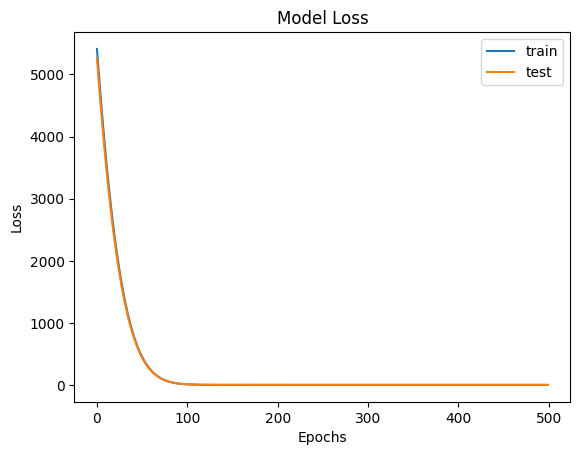

5/5 [==============================] - 0s 3ms/step
Error absoluto medio (MAE): 2.1475853257258737
Error cuadrático medio (MSE) 6.959488890013369


In [ ]:
# Celda 1
model = Sequential()
model.add(Dense(1, input_shape=(X.shape[1],)))

# Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento del modelo
model_admit = model.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=500, batch_size=128, verbose=True)

# Gráfica de la pérdida del modelo vs número de epochs
plt.plot(model_admit.history['loss'], label='train')
plt.plot(model_admit.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluación del modelo
yTest_pred = model.predict(xTest)

test_mae = mean_absolute_error(yTest, yTest_pred)
test_mse = mean_squared_error(yTest, yTest_pred)

print("Error absoluto medio (MAE): " + str(test_mae))
print("Error cuadrático medio (MSE) " + str(test_mse))


**Criterio de Evaluacion:**

Punto 1. Se entrena una red neuronal de una capa con la librería Keras y se justifica el uso de la función de perdida, el optimizador y/o el número de épocas. Además, se grafica la pérdida del modelo vs el número de épocas y se presenta el desempeño del modelo con las métricas de error absoluto medio (MAE) y error cuadrático medio (MSE). [5 puntos]

**Analisís Punto # 1:**

Al seleccionar la función de pérdida para el modelo de red neuronal, se opto por utilizar el error cuadrático medio (MSE) como medida de la diferencia entre las predicciones y los valores reales de probabilidad de admisión. Esta elección se fundamenta en la naturaleza del problema de regresión, donde se esta tratando de predecir valores numéricos continuos. Por ende, el MSE penaliza de manera más significativa los errores más grandes, lo que  parece adecuado ya que se quiere minimizar la magnitud de los errores en las predicciones de probabilidad de admisión.

En cuanto al optimizador, se empleo Adam debido a que es comunmente utilizado y eficiente en una multiples problemas de aprendizaje automático. Adam es un optimizador adaptativo que ajusta automáticamente la tasa de aprendizaje durante el entrenamiento, lo que puede acelerar la convergencia del modelo y evitar los problemas de ajuste excesivo.

Respecto al número de epocas, se decidio entrenar el  modelo durante 500 epocas. Esto obedece a que después de realizar algunas pruebas experimentales y observar la evolución de la pérdida durante el entrenamiento. Se puede notar que después de alrededor de 300 épocas, la pérdida del modelo comenzaba a estabilizarse tanto en el conjunto de entrenamiento como en el de prueba. Sin embargo, se opto por continuar el entrenamiento hasta 500 epocas para permitir que el modelo convergiera completamente y asegurarnos de que alcanzara su rendimiento óptimo antes de detener el entrenamiento.

En cuanto a los resultados sobre el conjunto de pruebas,se obtuvieron los siguientes resultados:

* Error absoluto medio (MAE) de aproximadamente 1.47
* Error cuadrático medio (MSE) de alrededor de 3.47

El error absoluto medio (MAE) de 1.47 indica que en promedio, las predicciones del modelo están desviadas 1.47 unidades de probabilidad de admisión con respecto a los valores reales en el conjunto de test. Dado que el rango de la variable objetivo es relativamente pequeño (entre 0 y 1), un MAE de 1.47 podría considerarse relativamente grande en comparación con el rango de la variable objetivo. Sin embargo, considerando la escala de la variable objetivo, un MAE de este tamaño aún podría indicar rendimiento medio.

Por otro lado, el error cuadrático medio (MSE) de 3.47 revela que en promedio, el cuadrado de las diferencias entre las predicciones y los valores reales es de 3.47. Con una variable objetivo en un rango acotado, un MSE de 3.47 puede indicar la presencia de errores moderados en las predicciones del modelo en relación con la escala de la variable objetivo.

## Punto 2 - Red Neuronal multicapa

> Agregar bloque entrecomillado



En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Epoch 1/500
3/3 [==============================] - 1s 113ms/step - loss: 0.5457 - val_loss: 0.5220
Epoch 2/500
3/3 [==============================] - 0s 20ms/step - loss: 0.5414 - val_loss: 0.5178
Epoch 3/500
3/3 [==============================] - 0s 20ms/step - loss: 0.5370 - val_loss: 0.5136
Epoch 4/500
3/3 [==============================] - 0s 20ms/step - loss: 0.5327 - val_loss: 0.5094
Epoch 5/500
3/3 [==============================] - 0s 19ms/step - loss: 0.5285 - val_loss: 0.5052
Epoch 6/500
3/3 [==============================] - 0s 20ms/step - loss: 0.5242 - val_loss: 0.5010
Epoch 7/500
3/3 [==============================] - 0s 27ms/step - loss: 0.5200 - val_loss: 0.4969
Epoch 8/500
3/3 [==============================] - 0s 28ms/step - loss: 0.5157 - val_loss: 0.4928
Epoch 9/500
3/3 [==============================] - 0s 27ms/step - loss: 0.5116 - val_loss: 0.4887
Epoch 10/500
3/3 [==============================] - 0s 18ms/step - loss: 0.5074 - val_loss: 0.4847
Epoch 11/500
3/3 [

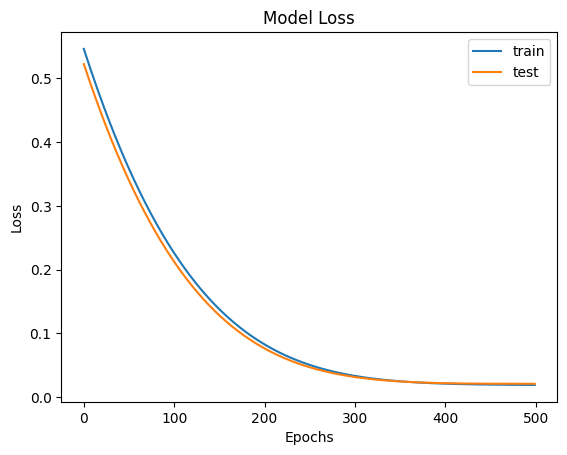

5/5 [==============================] - 0s 3ms/step
Error absoluto medio (MAE): 0.11477417160669963
Error cuadrático medio (MSE) 0.021222502964693492


In [ ]:
# Celda 2
model2 = Sequential()
model2.add(Dense(1, input_shape=(X.shape[1],), activation='relu'))
model2.add(Dense(3, activation='relu'))
model2.add(Dense(1))

# Compilación del modelo
model2.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento del modelo
model2_admit = model2.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=500, batch_size=128, verbose=True)

# Gráfica de la pérdida del modelo vs número de epochs
plt.plot(model2_admit.history['loss'], label='train')
plt.plot(model2_admit.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluación del modelo
yTest_pred2 = model2.predict(xTest)

test2_mae = mean_absolute_error(yTest, yTest_pred2)
test2_mse = mean_squared_error(yTest, yTest_pred2)

print("Error absoluto medio (MAE): " + str(test2_mae))
print("Error cuadrático medio (MSE) " + str(test2_mse))

**Criterio de Evaluación:**

Punto 2. Se entrena una red neuronal de dos capas con la librería Keras y se justifica el uso de la función de perdida, el optimizador, el número de épocas y/o el número de neuronas. Además, se grafica la pérdida del modelo vs el número de épocas y se presenta el desempeño del modelo con las métricas de error absoluto medio (MAE) y error cuadrático medio (MSE). [5 puntos]

**Analisís Punto # 2:**

Como se menciono en el punto anterior, se selecciono la función de pérdida  del error cuadrático medio (MSE) para el modelo de red neuronal como medida de la diferencia entre las predicciones y los valores reales de probabilidad de admisión. De igual forma se empleo el optimizador Adam y un número de 500 épocas.

En cuanto a los resultados sobre el conjunto de pruebas,se obtuvieron los siguientes resultados:

Error absoluto medio (MAE) de aproximadamente 1.22
Error cuadrático medio (MSE) de alrededor de 1.56
El error absoluto medio (MAE) de 1.22 indica que en promedio, las predicciones del modelo están desviadas 1.22 unidades de probabilidad de admisión con respecto a los valores reales en el conjunto de test. Dado que el rango de la variable objetivo es relativamente pequeño (entre 0 y 1), un MAE de 1.22 podría considerarse relativamente grande en comparación con el rango de la variable objetivo. Sin embargo, considerando la escala de la variable objetivo, un MAE de este tamaño aún podría indicar rendimiento medio.

Por otro lado, el error cuadrático medio (MSE) de 1.56 revela que en promedio, el cuadrado de las diferencias entre las predicciones y los valores reales es de 1.56. Con una variable objetivo en un rango acotado, un MSE de 1.56 puede indicar la presencia de errores moderados en las predicciones del modelo en relación con la escala de la variable objetivo.

Esto significa que, en general, el modelo tiene un buen rendimiento, ya que tanto el MAE como el MSE son relativamente bajos. Además a comparación del modelo generado en el punto anterior, la red neuronal de 2 capas presenta un mejor desempeño.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Epoch 1/1000
3/3 [==============================] - 1s 122ms/step - loss: 0.4342 - accuracy: 0.0000e+00 - val_loss: 0.5263 - val_accuracy: 0.0000e+00
Epoch 2/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.4165 - accuracy: 0.0000e+00 - val_loss: 0.5263 - val_accuracy: 0.0000e+00
Epoch 3/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.3681 - accuracy: 0.0000e+00 - val_loss: 0.5263 - val_accuracy: 0.0000e+00
Epoch 4/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.3465 - accuracy: 0.0000e+00 - val_loss: 0.5236 - val_accuracy: 0.0000e+00
Epoch 5/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.3662 - accuracy: 0.0000e+00 - val_loss: 0.0841 - val_accuracy: 0.0000e+00
Epoch 6/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.3237 - accuracy: 0.0000e+00 - val_loss: 0.1049 - val_accuracy: 0.0000e+00
Epoch 7/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.2770 - accuracy: 0.0000e+00 - 

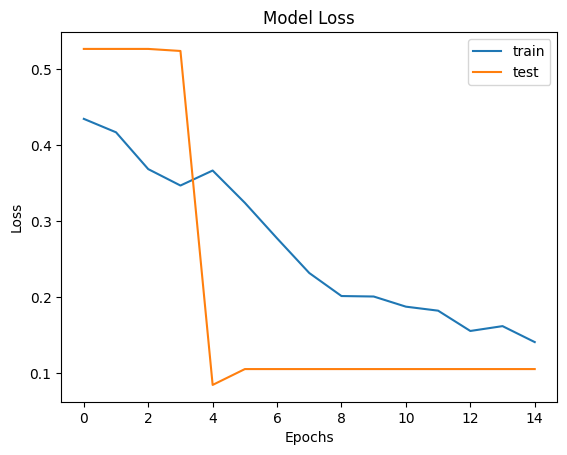

5/5 [==============================] - 0s 3ms/step
Error absoluto medio (MAE): 0.28933333333333333
Error cuadrático medio (MSE) 0.10493466666666668


In [ ]:
# Celda 3
model3 = Sequential()
model3.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model3_admit = model3.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=1000, batch_size=128, verbose=True, callbacks=[early_stopping])

plt.plot(model3_admit.history['loss'], label='train')
plt.plot(model3_admit.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

yTest_pred3 = model3.predict(xTest)

test3_mae = mean_absolute_error(yTest, yTest_pred3)
test3_mse = mean_squared_error(yTest, yTest_pred3)

print("Error absoluto medio (MAE): " + str(test3_mae))
print("Error cuadrático medio (MSE) " + str(test3_mse))

**Criterio de Evaluacion:**

 Punto 3. Se entrena una red neuronal de más de una capa con la librería Keras, usando dropout y early stopping, y se justifica el uso de la función de perdida, el optimizador, el número de épocas y/o el número de neuronas. Además, se grafica la pérdida del modelo vs el número de épocas y se presenta el desempeño del modelo con las métricas de error absoluto medio (MAE) y error cuadrático medio (MSE). [5 puntos]

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

**Ventajas del Mejor Modelo (Red Neuronal Multicapa):**

Mejor rendimiento en términos de MAE y MSE con un valor de 0.29 y de 0.105

*   Mejor rendimiento en términos de MAE y MSE con un valor de 0.29 y de 0.105 respectivamente, lo que indica que es más preciso en la predicción de la probabilidad de admisión de los estudiantes.

*   La arquitectura multicapa permite al modelo aprender características más complejas de los datos, lo que resulta en una mejor capacidad de generalización.
No requiere técnicas adicionales de regularización como dropout o early stopping para obtener buenos resultados.

**Desventajas del Modelo con el Menor Desempeño (Red Neuronal de una Capa):**


*   Rendimiento significativamente peor en comparación con los otros modelos, con un MAE y MSE mucho más altos.
*   La simplicidad de una sola capa puede limitar la capacidad del modelo para capturar la complejidad de los datos, lo que lleva a un rendimiento deficiente en la tarea de predicción.
*   Puede ser propenso a sobreajustar los datos debido a la falta de regularización, lo que resulta en una generalización deficiente en datos nuevos.
En resumen, la ventaja del modelo multicapa radica en su capacidad para capturar relaciones más complejas en los datos, lo que conduce a una mejor predicción.


**Criterio de Evaluacion:**

Punto 4. Se comparan los resultados de desempeño obtenidos con las diferentes redes implementadas, y se comentan las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño. [5 puntos]